# Honours Differential Equations
## Project Assignment

Due: Friday 2nd December 2022, noon

# Pranith Praveen
# s2097010

## Question 1

In [1]:
#IMPORTS
import sympy as sym
import numpy as np
sym.init_printing()
from IPython.display import display_latex
import math

Please **clearly** indicate where you answer each sub question by using a markdown cell.

# Part (a)

In [2]:
### Write your code here. You might want to add extra code cells if you prefer
x = sym.Function('x')
y = sym.Function('y')
t = sym.Symbol("t")
a = sym.Symbol("a")
b = sym.Symbol("b")
u = sym.Function('u')
v = sym.Function('v')

eq1 = sym.Eq(x(t).diff(t),y(t))
eq2 = sym.Eq(y(t).diff(t),-x(t)+a*(y(t)-(y(t))**3/3))
[eq1, eq2]

In [3]:
FG = sym.Matrix([eq1.rhs, eq2.rhs])
matJ = FG.jacobian([x(t), y(t)])
matJ

⎡0         1      ⎤
⎢                 ⎥
⎢      ⎛     2   ⎞⎥
⎣-1  a⋅⎝1 - y (t)⎠⎦

In [4]:
lin_mat = matJ.subs({x(t):0, y(t):0})
lin_mat * sym.Matrix([u(t),v(t)])

⎡    v(t)     ⎤
⎢             ⎥
⎣a⋅v(t) - u(t)⎦

In [5]:
lin_mat.eigenvects()[0][2][0],lin_mat.eigenvects()[1][2][0] #eigenvectors

⎛⎡      _________________⎤  ⎡      _________________⎤⎞
⎜⎢a   ╲╱ (a - 2)⋅(a + 2) ⎥  ⎢a   ╲╱ (a - 2)⋅(a + 2) ⎥⎟
⎜⎢─ + ───────────────────⎥  ⎢─ - ───────────────────⎥⎟
⎜⎢2            2         ⎥, ⎢2            2         ⎥⎟
⎜⎢                       ⎥  ⎢                       ⎥⎟
⎝⎣           1           ⎦  ⎣           1           ⎦⎠

In [6]:
evals = list(lin_mat.eigenvals().keys())
evals #eigenvalues

In [7]:
for i in range(-5,5):
    print("a = " + str(i))
    display_latex([evals[0].subs({a:i}) ,evals[1].subs({a:i}) ])


a = -5


a = -4


a = -3


a = -2


a = -1


a = 0


a = 1


a = 2


a = 3


a = 4


From the above results , we can see that when a is lesser than -1 , it produces a pair of real negative eigen values (nodal sink)
when it is 2 or greater , it produces positive real eigen values (source) ,  and when it is in [-1,2) , it produces imaginary eigen values and can produce either a spiral source or a spiral sink



# Part (b)

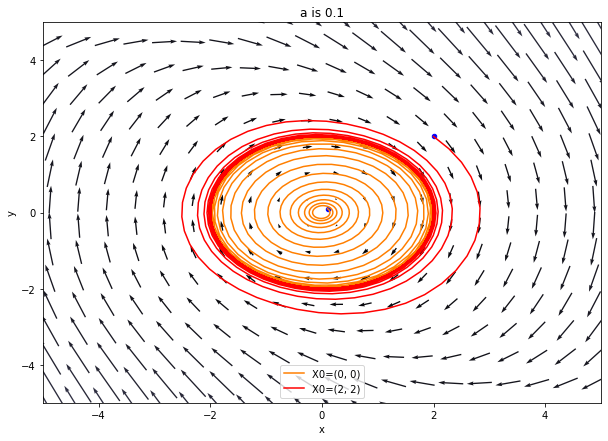

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = x[1]
    v = -x[0]+.1*(x[1]-((x[1]**3)/3))
    return [u,v]

# Plot vector field
X, Y = np.mgrid[-10:10:40j,-10:10:30j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.01, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0.1,0.1],[2,2]]
durations = [[0,200],[0,150]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],1000)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.title('a is 0.1')

plt.show()

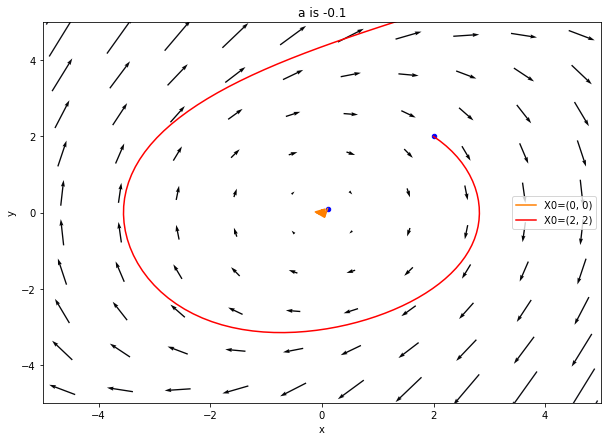

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):
    u = x[1]
    v = -1*x[0]-0.1*(x[1]-(x[1]**3)/3)
    return [u,v]

# Plot vector field
X, Y = np.mgrid[-15:15:30j,-15:15:30j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.01, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0.1,0.1],[2,2]]
durations = [[0,200],[0,6]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.title('a is -0.1')

plt.show()

At a = 0.1 , it produces a spiral sink , and at a = -0.1 , it produces a spiral source , which is in accordance with the results from part (a)

## Question 2

Please **clearly** indicate where you answer each sub question by using a markdown cell.

# Part (a)

In [10]:
## Write your code here. You might want to add extra code cells if you prefer
x = sym.Function('x')
y = sym.Function('y')
t = sym.Symbol("t")
a = sym.Symbol("a")
b = sym.Symbol("b")
u = sym.Function('u')
v = sym.Function('v')

eq1 = sym.Eq(x(t).diff(t),a - x(t) -b*x(t) +x(t)**2*y(t))
eq2 = sym.Eq(y(t).diff(t),b*x(t)-x(t)**2*y(t))
[eq1, eq2]




In [11]:
FG = sym.Matrix([eq1.rhs, eq2.rhs])

display_latex(sym.solve(FG))
print("x(t) = a and y(t) = b/a")

x(t) = a and y(t) = b/a


In [12]:
FG = sym.Matrix([eq1.rhs, eq2.rhs])
matJ = FG.jacobian([x(t), y(t)])
display_latex(matJ)

print("subbing x(t) = a and y(t) = b/a")
lin_mat = matJ.subs({x(t):a, y(t):(b/a)})
display_latex(lin_mat)

subbing x(t) = a and y(t) = b/a


In [13]:
lin_mat.eigenvects()[0][2][0],lin_mat.eigenvects()[1][2][0] # Eigenvectors

⎛⎡                     _______________________________________    ⎤  ⎡        
⎜⎢          2         ╱ ⎛ 2              ⎞ ⎛ 2              ⎞     ⎥  ⎢        
⎜⎢         a    b   ╲╱  ⎝a  - 2⋅a - b + 1⎠⋅⎝a  + 2⋅a - b + 1⎠    1⎥  ⎢        
⎜⎢   2   - ── + ─ - ────────────────────────────────────────── - ─⎥  ⎢   2   -
⎜⎢  a      2    2                       2                        2⎥, ⎢  a     
⎜⎢- ── - ─────────────────────────────────────────────────────────⎥  ⎢- ── - ─
⎜⎢  b                                b                            ⎥  ⎢  b     
⎜⎢                                                                ⎥  ⎢        
⎝⎣                               1                                ⎦  ⎣        

             _______________________________________    ⎤⎞
  2         ╱ ⎛ 2              ⎞ ⎛ 2              ⎞     ⎥⎟
 a    b   ╲╱  ⎝a  - 2⋅a - b + 1⎠⋅⎝a  + 2⋅a - b + 1⎠    1⎥⎟
 ── + ─ + ────────────────────────────────────────── - ─⎥⎟
 2    2                       2                     

In [14]:
evals = list(lin_mat.eigenvals().keys())# Eigenvals
evals


# Part (b)

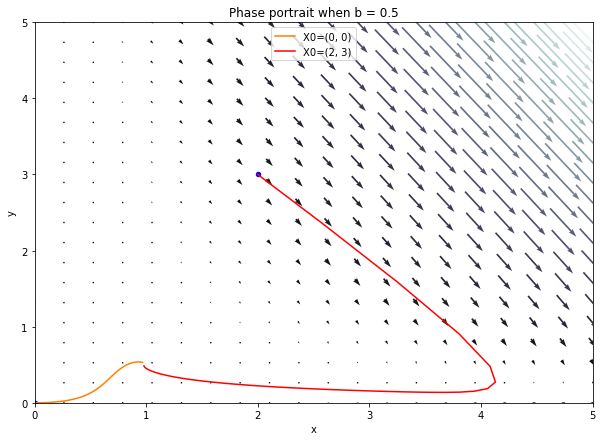

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):# b is 0.5
    u = 1 - x[0] - 0.5*x[0] + (x[0]**2)*x[1]
    v = 0.5*x[0] - x[0]**2*x[1]
    return [u,v]

# Plot vector field
X, Y = np.mgrid[0:5:20j,0:5:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0,0],[2,3]]
durations = [[0,5],[0,5]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.title('Phase portrait when b = 0.5')

plt.show()

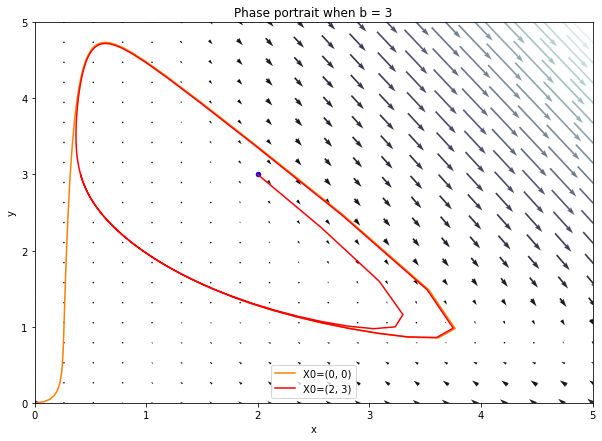

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t):#b is 3
    u = 1- x[0] - 3*x[0] + (x[0]**2)*x[1]
    v = 3*x[0] - x[0]**2*x[1]
    return [u,v]

# Plot vector field
X, Y = np.mgrid[0:5:20j,0:5:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0,0],[2,3]]
durations = [[0,10],[0,10]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.title('Phase portrait when b = 3')

plt.show()

We get a spiral source for 3 and a spiral sink for 0.5

# Part (c)

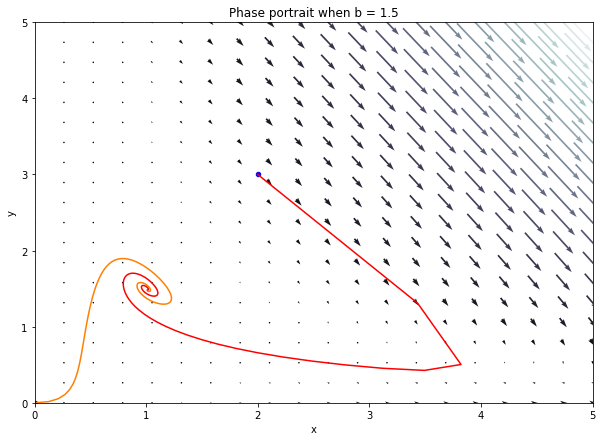

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t): # b = 1.5
    u = 1 - x[0] - 1.5*x[0] + x[0]**2*x[1]
    v = 1.5*x[0] - x[0]**2*x[1]
    return [u,v]

# Plot vector field
X, Y = np.mgrid[0:5:20j,0:5:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0,0],[2,3]]
durations = [[0,15],[0,15]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.title('Phase portrait when b = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,5)

plt.show()

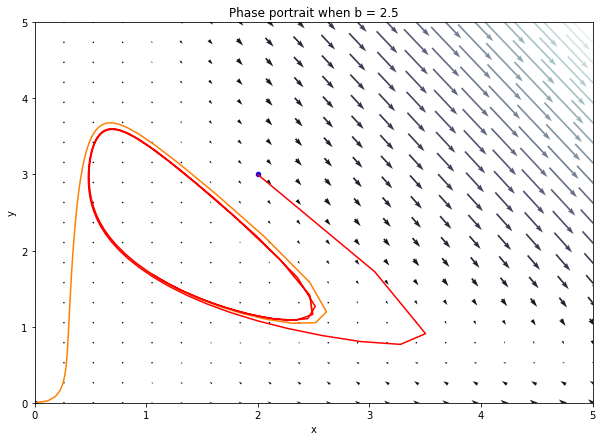

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define vector field
def vField(x,t): # b = 2.5
    u = 1 - x[0] - 2.5*x[0] + x[0]**2*x[1]
    v = 2.5*x[0] - x[0]**2*x[1]
    return [u,v]

# Plot vector field
X, Y = np.mgrid[0:5:20j,0:5:20j]
U, V = vField([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

fig, ax = plt.subplots(figsize=(10, 7))
ax.quiver(X, Y, U, V, M, scale=1/0.001, pivot = 'mid', cmap = plt.cm.bone)

# Settings for trajectories
ics  = [[0,0],[2,3]]
durations = [[0,15],[0,15]]
vcolors = plt.cm.autumn_r(np.linspace(0.5, 1., len(ics)))  # colors for each trajectory

# plot trajectories
for i, ic in enumerate(ics):
    t = np.linspace(durations[i][0], durations[i][1],100)
    x = odeint(vField, ic, t)
    ax.plot(x[:,0], x[:,1], color=vcolors[i], label='X0=(%.f, %.f)' % (ic[0], ic[1]) )

ic_x = [ic[0] for ic in ics]
ic_y = [ic[1] for ic in ics]
ax.scatter(ic_x, ic_y, color='blue', s=20)
# note: you can replace ic_x, ic_y with *list(zip(*ics)) but this is a bit cryptic!

plt.title('Phase portrait when b = 2.5')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5)
plt.ylim(0,5)

plt.show()

In [19]:
evals[0].subs({a:1,b:2.5}) # when b is 2.5

In [20]:
evals[0].subs({a:1,b:1.5}) # when b is 1.5

In [21]:
evals[0].subs({a:1,b:2})# when b is 2

From the above result we see that when b is 2 , we only get an imaginary part with a 0 real part and this is where the bifurcation takles place , and hence for values greater than 2 , a spiral source is formed and for values lesser than 2 a spiral sink is formed

# Part (d)

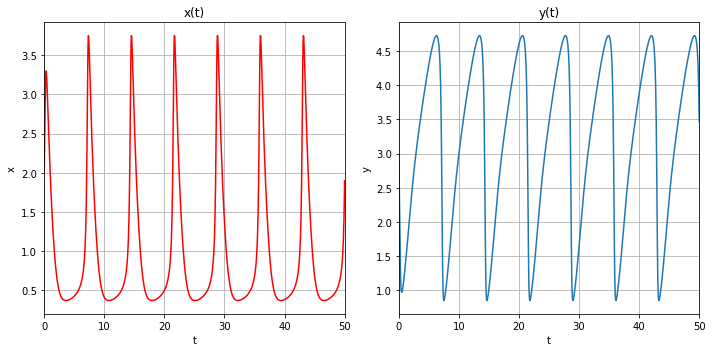

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
def dX_dt(X, t):
    x1, x2 = X
    return [1- x1 - 3*x1 + x1**2*x2, 3*x1 - x1**2*x2]
X0 = [2, 3]
t = np.linspace(0, 50, 1000)
Xsol = odeint(dX_dt, X0, t)

axes[0].plot(t, Xsol[:, 0],'r')
axes[0].set_title("x(t)")
axes[0].set_xlabel("t")
axes[0].set_ylabel("x")
axes[0].set_xlim(0,50)
axes[0].grid(True)

axes[1].plot(t, Xsol[:, 1])
axes[1].set_title("y(t)")
axes[1].set_xlabel("t")
axes[1].set_ylabel("y")
axes[1].set_xlim(0,50)
axes[1].grid(True)

fig.tight_layout()

plt.show()


Write your written solution here. You may have to include extra markdown cells.

## Question 3

Please **clearly** indicate where you answer each sub question by using a markdown cell.

# Part (a)

In [23]:
### Write your code here. You might want to add extra code cells if you prefer

def ModifiedEuler(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        h = times[k+1]-t
        x[k+1,:] = x[k,:]+ h*vectorField(x[k,:]+0.5*h*vectorField(x[k,:],t),t + 0.5*h)
    return x

# Part (b)

In [24]:
def timesteps(start, stop, h):
    num_steps = math.ceil((stop - start)/h)
    return np.linspace(start, start+num_steps*h, num_steps+1)

def ModifiedEuler_step(vectorField, start, stop, h, ics):
    t = timesteps(start, stop, h)
    x = ModifiedEuler(vectorField, t, ics)
    return x, t

def eqn_dy_dt(y, t):
    return 5*t - 2*y**0.5

import pandas as pd
times = [0,0.1,0.2,0.3,0.4]
values = []
for t in times:
    eq_values, eq_times = ModifiedEuler_step(eqn_dy_dt,0,t,0.05,2)
    values.append(eq_values[-1][0])

pd.DataFrame(data = values, index = times, columns = ["Modified euler ,h = 0.05"])

,"Modified euler ,h = 0.05"
0.0,2.000000
0.1,1.751741
0.2,1.569657
0.3,1.449553
0.4,1.386962


# Part (c)

In [25]:
t = sym.symbols('t')
y = sym.Function('y')
eq1 = sym.Eq(y(t).diff(t), 5*t-2*(y(t)**0.5))
exact = sym.dsolve(eq1, y(t), ics={y(0):2},hint ='best')
exact

# Part (d)

In [26]:
def exact(t): # returning exact solution excluding the O(t^6)
      return 2 - 2.82842712474619*t + 3.5*t**2 - 0.58925565098879*t**3 - 0.208333333333333*t**4 + 0.0220970869120796*t**5
    
def Euler(vectorField,times,initialConditions):
    n = vectorField(initialConditions,times[0]).size
    x = np.zeros((times.size,n))
    x[0,:] = initialConditions
    for k, t in enumerate(times[:-1]):
        x[k+1,:] = x[k,:]+(times[k+1]-t)*vectorField(x[k,:],t)
    return x

def Euler_step(vectorField, start, stop, h, ics):
    t = timesteps(start, stop, h)
    x = Euler(vectorField, t, ics)
    return x, t

tVals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
me_vals = []
e_vals = []
exact_vals = []

for tval in tVals:
    me_values, eq_times = ModifiedEuler_step(eqn_dy_dt,0,tval,0.05,2)
    e_values, eq_times = Euler_step(eqn_dy_dt,0,tval,0.05,2)
    
    
    me_vals.append(me_values[-1][0])
    e_vals.append(e_values[-1][0])
    exact_vals.append(exact(tval))
    
    

In [27]:
import pandas as pd
data = {
    "Euler, h=0.05":e_vals,
    "Modified Euler, h=0.05":me_vals,
    "Exact":exact_vals
}
pd.DataFrame(data = data, index = tVals)

,"Euler, h=0.05","Modified Euler, h=0.05",Exact
0.0,2.000000,2.000000,2.000000
0.1,1.734749,1.751741,1.751547
0.2,1.537944,1.569657,1.569274
0.3,1.405438,1.449553,1.448928
0.4,1.332687,1.386962,1.385810
0.5,1.314973,1.377377,1.374799
1.0,1.906060,1.990196,1.896081


## Question 4

Please **clearly** indicate where you answer each sub question by using a markdown cell.

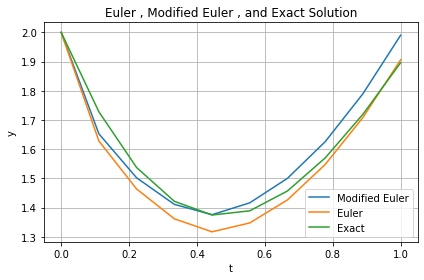

In [28]:
tVals = list(np.linspace(0,1,10))
me_vals = []
e_vals = []
exact_vals = []

for tval in tVals:
    me_values, eq_times = ModifiedEuler_step(eqn_dy_dt,0,tval,0.05,2)
    e_values, eq_times = Euler_step(eqn_dy_dt,0,tval,0.05,2)
    
    
    me_vals.append(me_values[-1][0])
    e_vals.append(e_values[-1][0])
    exact_vals.append(exact(tval))

fig, axes = plt.subplots()

axes.plot(tVals, me_vals,label='Modified Euler',)
axes.plot(tVals, e_vals,label='Euler')
axes.plot(tVals, exact_vals,label='Exact')
axes.set(xlabel='t',ylabel = "y",
       title='Euler , Modified Euler , and Exact Solution')
axes.legend()
axes.grid(True)
fig.tight_layout()

plt.show()

# Part (a)

In [29]:
## Write your code here. You might want to add extra code cells if you prefer

def Rossler_dX_dt(X, t):
    x, y, z = X
    return [-y-z, x+(1/5)*y, (1/5) + (x-(5/2))*z]

X0 = [0, 0, 0]
t = np.linspace(0, 100, 1000)
Xsol = odeint(Rossler_dX_dt, X0, t)


Write your written solution here. You may have to include extra markdown cells.

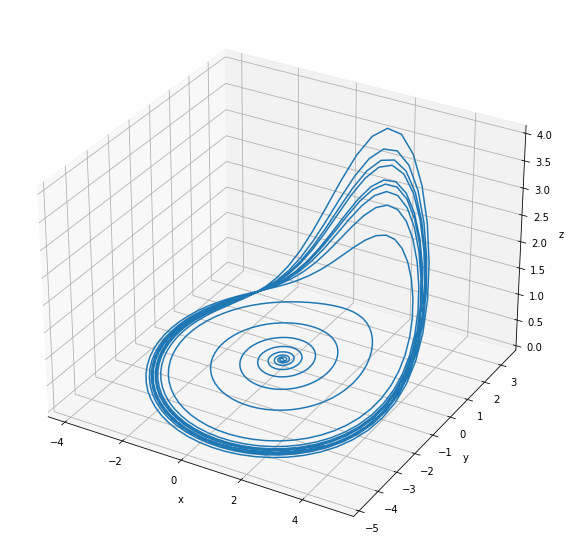

In [30]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

'''
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d') #get matplotlib deprecation warning
'''
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

plt.plot(Xsol[:, 0], Xsol[:, 1], Xsol[:, 2])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()




# Part (b)

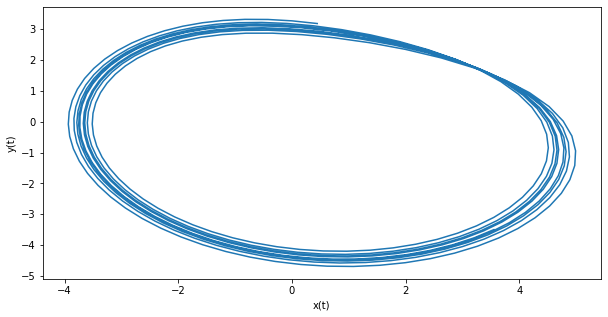

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

t = np.linspace(0, 100, 1000)
Xsol = odeint(Rossler_dX_dt, X0, t)
plt.plot(Xsol[:, 0][500:],Xsol[:, 1][500:])

ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')

plt.show()

# Part (c)

In [32]:
def Rossler_dX_dt(X, t):# when 5/2 is 3
    x, y, z = X
    return [-y-z, x+(1/5)*y, (1/5) + (x-3)*z]

X0 = [0, 0, 0]
t = np.linspace(0, 100, 1000)
Xsol_3 = odeint(Rossler_dX_dt, X0, t)

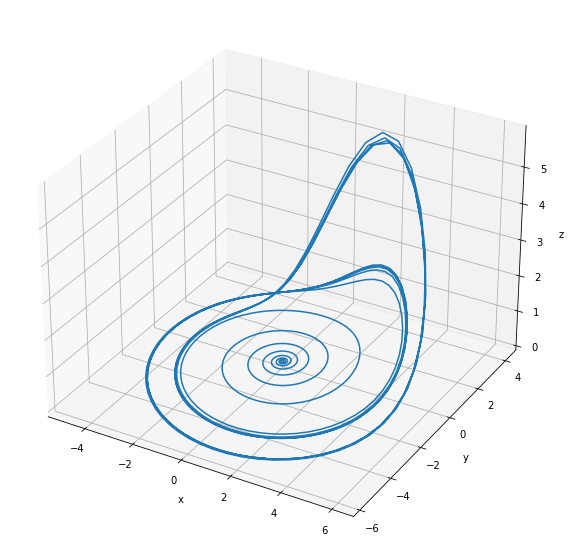

In [33]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

plt.plot(Xsol_3[:, 0], Xsol_3[:, 1], Xsol_3[:, 2])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

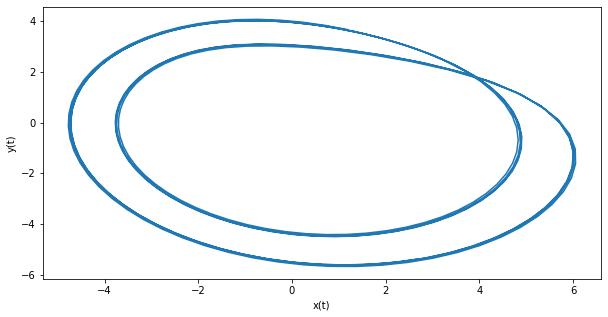

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

t = np.linspace(0, 100, 1000)
Xsol = odeint(Rossler_dX_dt, X0, t)
plt.plot(Xsol[:, 0][500:],(Xsol[:, 1][500:]))

ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')

plt.show()